In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_64667/2003827560.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
merged_dataset = pd.read_excel("merged_dataset.xlsx")
print("The number of unique cations is:",len(set(merged_dataset["Cation_Name"])))
print("The number of unique anions is:",len(set(merged_dataset["Anion_Name"])))

The number of unique cations is: 958
The number of unique anions is: 272


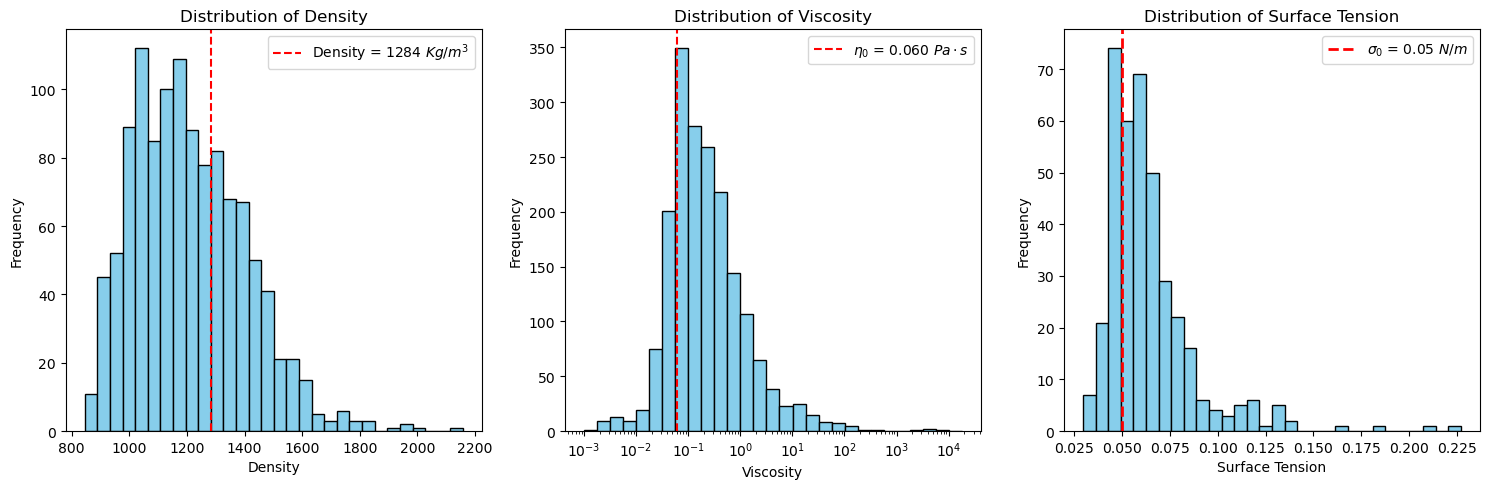

In [6]:
dens_req = 1284    # EMIBF4
visc_req = 0.037223 # EMIBF4
visc_req = 0.060121 # EMIFAP
sten_req = 0.05

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Density Plot
axs[0].hist(merged_dataset["Density"].dropna(), bins=30, color='skyblue', edgecolor='black')
axs[0].axvline(x=dens_req, color='red', linestyle='--', label=f'Density = {dens_req} $Kg/m^3$')
axs[0].set_title('Distribution of Density')
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Viscosity Plot
log_bins = np.logspace(np.log10(0.001), np.log10(18000), 30)
axs[1].hist(merged_dataset["η0"].dropna(), bins=log_bins, color='skyblue', edgecolor='black')
axs[1].set_xscale('log')
axs[1].axvline(x=visc_req, color='red', linestyle='--', label=f'$\eta_0$ = {visc_req:.3f} $Pa \cdot s$')
axs[1].set_title('Distribution of Viscosity')
axs[1].set_xlabel('Viscosity')
axs[1].set_ylabel('Frequency')
axs[1].legend()

# Surface Tension Plot
axs[2].hist(merged_dataset["σ0"].dropna(), bins=30, color='skyblue', edgecolor='black')
axs[2].axvline(x=sten_req, color='red', linestyle='--', lw=2, label=f'$\sigma_0$ = {sten_req} $N/m$')
axs[2].set_title('Distribution of Surface Tension')
axs[2].set_xlabel('Surface Tension')
axs[2].set_ylabel('Frequency')
axs[2].legend()

plt.tight_layout()
plt.show()


In [7]:
condition_accepted = (merged_dataset["Density"] >= dens_req) & (merged_dataset["η0"] <= visc_req) & (merged_dataset["σ0"] >= sten_req)
condition_rejected = (merged_dataset["Density"] < dens_req) | (merged_dataset["η0"] > visc_req) | (merged_dataset["η0"] < sten_req)
uncertain_mask = ~(condition_accepted | condition_rejected)


accepted= merged_dataset[condition_accepted]
rejected= merged_dataset[condition_rejected]
uncertain = merged_dataset[uncertain_mask]

print("the number of ILs that satisfy all requirements is:", rejected.shape[0])
print("the number of ILs that are rejected is:", rejected.shape[0])
print("The number of ILs that we are uncertain about is:", uncertain.shape[0])
print("---")
print("The ILs that satisfy all requirements are:")
accepted


the number of ILs that satisfy all requirements is: 1957
the number of ILs that are rejected is: 1957
The number of ILs that we are uncertain about is: 300
---
The ILs that satisfy all requirements are:


,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density,η0,σ0
231,"1,3-dimethyl-1H-imidazol-3-ium",bis(trifluoromethylsulfonyl)azanide,Cn1cc[n+](C)c1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,97.138,280.147,1569.049191,0.038385,0.056394
480,1-butyl-1-methylpyrrolidin-1-ium,bis(flurosulfonyl)azanide,CCCC[N+]1(C)CCCC1,FS(=O)(=O)[N-]S(F)(=O)=O,142.261,180.132,1306.878044,0.056272,0.063883
613,1-butyl-3-methyl-1H-imidazol-3-ium,tetrachloroferrate (III),CCCCn1cc[n+](C)c1,Cl[Fe-](Cl)(Cl)Cl,139.218,197.658,1365.676142,0.046000,0.063467
650,1-butyl-4-methylpyridin-1-ium,bis(trifluoromethylsulfonyl)azanide,CCCC[n+]1ccc(C)cc1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,150.240,280.147,1412.146712,0.055959,0.051208
801,1-ethyl-3-methyl-1H-imidazol-3-ium,bis(trifluoromethylsulfonyl)azanide,CCn1cc[n+](C)c1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,111.164,280.147,1518.598257,0.032092,0.053045
847,1-ethyl-3-methyl-1H-imidazol-3-ium,tetrachloroaluminate,CCn1cc[n+](C)c1,Cl[Al-](Cl)(Cl)Cl,111.164,168.794,1295.215487,0.017910,0.073243
849,1-ethyl-3-methyl-1H-imidazol-3-ium,tetrachlorogallate,CCn1cc[n+](C)c1,Cl[Ga-](Cl)(Cl)Cl,111.164,211.536,1474.900509,0.013000,0.086757
852,1-ethyl-3-methyl-1H-imidazol-3-ium,tetrafluoroborate,CCn1cc[n+](C)c1,F[B-](F)(F)F,111.164,86.805,1284.238568,0.037222,0.064249
864,1-ethyl-3-methyl-1H-imidazol-3-ium,trifluoroacetate,CCn1cc[n+](C)c1,[O-]C(=O)C(F)(F)F,111.164,113.016,1291.499820,0.031351,0.067669
865,1-ethyl-3-methyl-1H-imidazol-3-ium,trifluoromethanesulfonate,CCn1cc[n+](C)c1,[O-]S(=O)(=O)C(F)(F)F,111.164,149.070,1384.276236,0.040498,0.056471


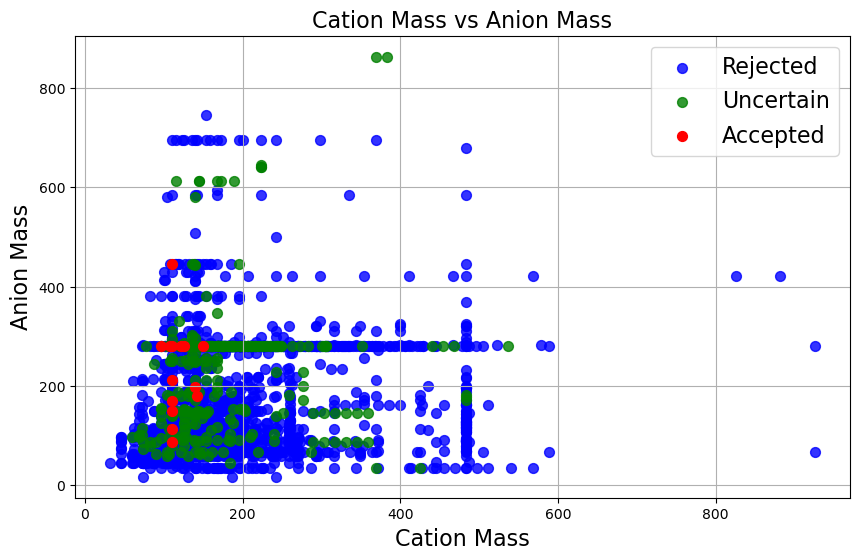

In [8]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

plt.scatter(rejected["Cation_Mass"], rejected["Anion_Mass"],marker='o', s=50, color="blue",alpha=0.8,label="Rejected")
plt.scatter(uncertain["Cation_Mass"], uncertain["Anion_Mass"],marker='o', s=50, color="green",alpha=0.8,label="Uncertain")
plt.scatter(accepted["Cation_Mass"], accepted["Anion_Mass"],marker='o', s=50,color="red",alpha=1,label="Accepted") 

plt.title('Cation Mass vs Anion Mass',fontsize=16)  # Title of the plot
plt.xlabel('Cation Mass',fontsize=16)  # X-axis label
plt.ylabel('Anion Mass',fontsize=16)  # Y-axis label
plt.grid(True)  # Show grid lines (optional)
plt.legend(fontsize=16)

plt.show()  # Display the plot

____

## Molecular Descriptors


In [9]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem

import mordred
from mordred import Calculator, descriptors


In [10]:
cat_accept = accepted[["Cation_Name", "Cation_SMILES", "Cation_Mass"]].copy()
an_accept = accepted[["Anion_Name", "Anion_SMILES", "Anion_Mass"]].copy()

cat_reject = rejected[["Cation_Name", "Cation_SMILES", "Cation_Mass"]].copy()
an_reject = rejected[["Anion_Name", "Anion_SMILES", "Anion_Mass"]].copy()

In [11]:
mol_cat_list = []
for smile in cat_accept["Cation_SMILES"]:
  mol = Chem.MolFromSmiles(smile) #Convert SMILES to molecules (without Hydrogen)
  mol = Chem.AddHs(mol) # Add Hudrogen
  mol_cat_list.append(mol)
mol_cat_list

# Create a DataFrame from mol_cat_list with the same index as cat_accept
mol_df_cat = pd.DataFrame(mol_cat_list, columns=['Mol'], index=cat_accept.index)
# Concatenate cat_accept with mol_df
cat_accept= pd.concat([cat_accept, mol_df_cat], axis=1)
cat_accept

,Cation_Name,Cation_SMILES,Cation_Mass,Mol
231,"1,3-dimethyl-1H-imidazol-3-ium",Cn1cc[n+](C)c1,97.138,"<img data-content=""rdkit/molecule"" src=""data:i..."
480,1-butyl-1-methylpyrrolidin-1-ium,CCCC[N+]1(C)CCCC1,142.261,"<img data-content=""rdkit/molecule"" src=""data:i..."
613,1-butyl-3-methyl-1H-imidazol-3-ium,CCCCn1cc[n+](C)c1,139.218,"<img data-content=""rdkit/molecule"" src=""data:i..."
650,1-butyl-4-methylpyridin-1-ium,CCCC[n+]1ccc(C)cc1,150.240,"<img data-content=""rdkit/molecule"" src=""data:i..."
801,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,"<img data-content=""rdkit/molecule"" src=""data:i..."
847,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,"<img data-content=""rdkit/molecule"" src=""data:i..."
849,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,"<img data-content=""rdkit/molecule"" src=""data:i..."
852,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,"<img data-content=""rdkit/molecule"" src=""data:i..."
864,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,"<img data-content=""rdkit/molecule"" src=""data:i..."
865,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,"<img data-content=""rdkit/molecule"" src=""data:i..."


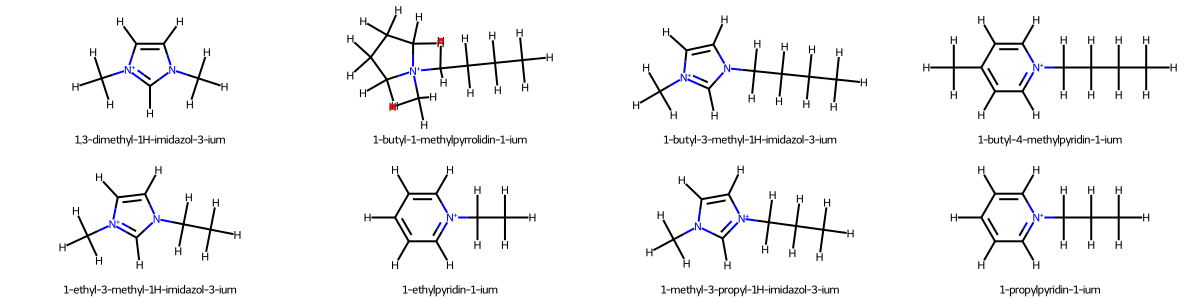

In [12]:
unique_cations=cat_accept.drop_duplicates(subset=['Cation_Name'])
Draw.MolsToGridImage(unique_cations['Mol'],molsPerRow=4,subImgSize=(300,150),legends=[x for x in unique_cations['Cation_Name']])


In [13]:
an_accept

,Anion_Name,Anion_SMILES,Anion_Mass
231,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147
480,bis(flurosulfonyl)azanide,FS(=O)(=O)[N-]S(F)(=O)=O,180.132
613,tetrachloroferrate (III),Cl[Fe-](Cl)(Cl)Cl,197.658
650,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147
801,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147
847,tetrachloroaluminate,Cl[Al-](Cl)(Cl)Cl,168.794
849,tetrachlorogallate,Cl[Ga-](Cl)(Cl)Cl,211.536
852,tetrafluoroborate,F[B-](F)(F)F,86.805
864,trifluoroacetate,[O-]C(=O)C(F)(F)F,113.016
865,trifluoromethanesulfonate,[O-]S(=O)(=O)C(F)(F)F,149.070


In [14]:
mol_an_list = []

for smile in an_accept["Anion_SMILES"]:
  mol = Chem.MolFromSmiles(smile) #Convert SMILES to molecules (without Hydrogen)
  mol = Chem.AddHs(mol) # Add Hudrogen
  mol_an_list.append(mol)
mol_an_list

# Create a DataFrame from mol_cat_list with the same index as cat_accept
mol_df_an = pd.DataFrame(mol_an_list, columns=['Mol'], index=cat_accept.index)
# Concatenate cat_accept with mol_df
an_accept= pd.concat([an_accept, mol_df_an], axis=1)


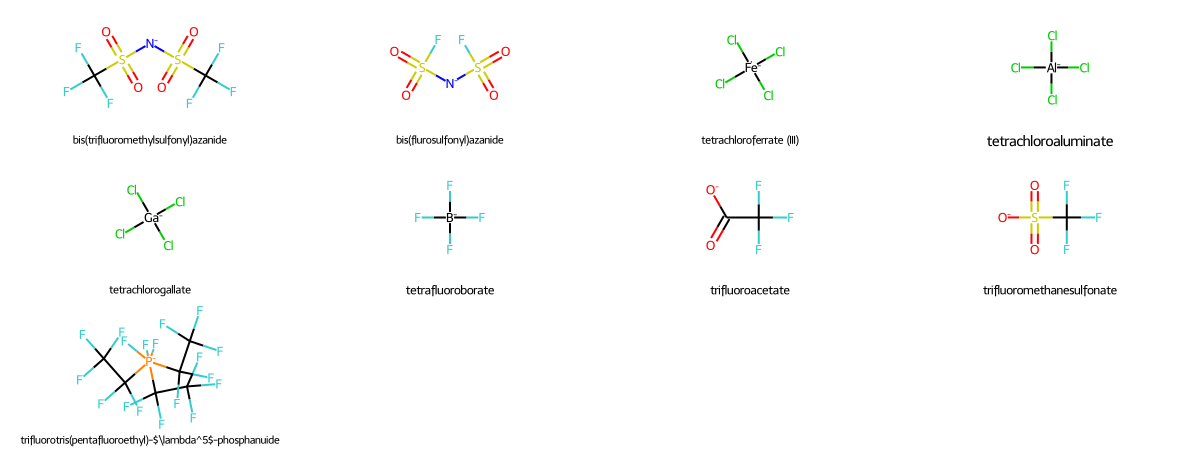

In [15]:
unique_anions=an_accept.drop_duplicates(subset=['Anion_Name'])
Draw.MolsToGridImage(unique_anions['Mol'],molsPerRow=4,subImgSize=(300,150),legends=[x for x in unique_anions['Anion_Name']])

#### Create calculator object to calculate 2D descriptors



In [16]:
# Creating a descriptor calculator with all descriptors
calc2d = Calculator(descriptors, ignore_3D=True)

In [17]:
# calc.descriptors contains all the descriptor classes
print(calc2d.descriptors[:5])

(mordred.ABCIndex.ABCIndex(), mordred.ABCIndex.ABCGGIndex(), mordred.AcidBase.AcidicGroupCount(), mordred.AcidBase.BasicGroupCount(), mordred.AdjacencyMatrix.AdjacencyMatrix('SpAbs'))


In [18]:
# print the names of descriptors
all_descriptor_names = [desc.__class__.__name__ for desc in calc2d.descriptors]
print(all_descriptor_names[:20])

['ABCIndex', 'ABCGGIndex', 'AcidicGroupCount', 'BasicGroupCount', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AromaticAtomsCount', 'AromaticBondsCount', 'AtomCount', 'AtomCount']


In [19]:
# Checking the length of descriptors in the calculator
len(all_descriptor_names)

1613

In [20]:
# Calculating descriptors for a single molecule
ac = mordred.Autocorrelation.ATS(2, 'Z')
ac(cat_accept['Mol'].iloc[2])



625.0

#### Calculate all the descriptors for a dataframe



In [21]:
descriptors_cat = calc2d.pandas(cat_accept['Mol'])
descriptors_an = calc2d.pandas(an_accept['Mol'])

100%|██████████| 14/14 [00:01<00:00,  9.87it/s]


In [22]:
descriptors_cat

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
231,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,8.318418,2.198691,4.110920,8.318418,1.188345,2.861501,...,8.206584,47.382536,97.076025,6.067252,41,4,32.0,34.0,2.972222,1.583333
480,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,12.349859,2.306090,4.483692,12.349859,1.234986,3.201531,...,8.849514,52.733735,142.159026,4.738634,124,9,46.0,50.0,3.812500,2.375000
613,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,12.426800,2.236324,4.251712,12.426800,1.242680,3.191982,...,8.497195,51.903908,139.122975,5.564919,132,8,44.0,47.0,3.722222,2.416667
650,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,13.725227,2.205946,4.411892,13.725227,1.247748,3.278326,...,8.696677,40.025593,150.127726,5.560286,174,11,48.0,51.0,3.972222,2.666667
801,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
847,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
849,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
852,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
864,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
865,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667


In [23]:
descriptors_an.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
231,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5000,2.875
480,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.936238,2.236068,4.472136,7.936238,0.881804,3.058355,...,8.815370,37.856472,179.924229,19.991581,88,6,42.0,40.0,6.3750,1.750
613,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,195.810897,39.162179,16,0,20.0,16.0,4.0625,1.000
650,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5000,2.875
801,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.5000,2.875


In [24]:
descriptors_an

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
231,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
480,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.936238,2.236068,4.472136,7.936238,0.881804,3.058355,...,8.815370,37.856472,179.924229,19.991581,88,6,42.0,40.0,6.375000,1.7500
613,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,195.810897,39.162179,16,0,20.0,16.0,4.062500,1.0000
650,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
801,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,14.330127,0.955342,3.593235,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
847,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,166.857498,33.371500,16,0,20.0,16.0,4.062500,1.0000
849,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,208.801533,41.760307,16,0,20.0,16.0,4.062500,1.0000
852,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,87.003467,17.400693,16,0,20.0,16.0,4.062500,1.0000
864,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,6.602720,2.175328,4.350655,6.602720,0.943246,2.792781,...,8.466531,34.219913,112.985587,16.140798,42,6,30.0,30.0,5.173611,1.5000
865,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.211103,2.302776,4.605551,7.211103,0.901388,2.947233,...,9.037771,36.999431,148.952573,18.619072,58,9,38.0,40.0,6.125000,1.5625


## Physical descriptors 3D

In [25]:
# Creating a descriptor calculator with all descriptors
calc3d = Calculator(descriptors, ignore_3D=False)

In [26]:
# calc.descriptors contains all the descriptor classes
print(calc3d.descriptors[:5])

(mordred.ABCIndex.ABCIndex(), mordred.ABCIndex.ABCGGIndex(), mordred.AcidBase.AcidicGroupCount(), mordred.AcidBase.BasicGroupCount(), mordred.AdjacencyMatrix.AdjacencyMatrix('SpAbs'))


In [27]:
# print the names of descriptors
all_descriptor_names = [desc.__class__.__name__ for desc in calc3d.descriptors]
print(all_descriptor_names[:20])

['ABCIndex', 'ABCGGIndex', 'AcidicGroupCount', 'BasicGroupCount', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AdjacencyMatrix', 'AromaticAtomsCount', 'AromaticBondsCount', 'AtomCount', 'AtomCount']


In [28]:
len(all_descriptor_names)

1826

In [29]:
# Function to generate 3D coordinates using RDKit
def generate_3d_coordinates(molecule):
    AllChem.EmbedMolecule(molecule)
    AllChem.MMFFOptimizeMolecule(molecule)

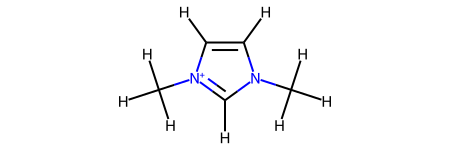

In [30]:
cat_accept['Mol'].iloc[0]

In [31]:
generate_3d_coordinates(cat_accept['Mol'].iloc[0])

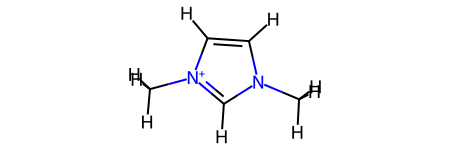

In [32]:
cat_accept['Mol'].iloc[0]

In [33]:
# Iterate through molecules
dcat_accept = []
for mol in tqdm(cat_accept['Mol']):
  generate_3d_coordinates(mol)

 # Calculate descriptors
  result = calc3d(mol)
  dcat_accept.append(result)


100%|██████████| 14/14 [00:04<00:00,  3.09it/s]


In [34]:
df_from_dcat_accept = pd.DataFrame(dcat_accept, columns = (str(key) for key in result.keys()),index=cat_accept.index)
cat3d_accept = pd.concat([cat_accept[['Cation_Name', 'Cation_SMILES', 'Cation_Mass']], df_from_dcat_accept], axis=1)
cat3d_accept


,Cation_Name,Cation_SMILES,Cation_Mass,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
231,"1,3-dimethyl-1H-imidazol-3-ium",Cn1cc[n+](C)c1,97.138,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,8.318418,2.198691,4.110920,...,8.206584,47.382536,97.076025,6.067252,41,4,32.0,34.0,2.972222,1.583333
480,1-butyl-1-methylpyrrolidin-1-ium,CCCC[N+]1(C)CCCC1,142.261,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,12.349859,2.306090,4.483692,...,8.849514,52.733735,142.159026,4.738634,124,9,46.0,50.0,3.812500,2.375000
613,1-butyl-3-methyl-1H-imidazol-3-ium,CCCCn1cc[n+](C)c1,139.218,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,12.426800,2.236324,4.251712,...,8.497195,51.903908,139.122975,5.564919,132,8,44.0,47.0,3.722222,2.416667
650,1-butyl-4-methylpyridin-1-ium,CCCC[n+]1ccc(C)cc1,150.240,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,13.725227,2.205946,4.411892,...,8.696677,40.025593,150.127726,5.560286,174,11,48.0,51.0,3.972222,2.666667
801,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
847,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
849,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
852,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
864,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667
865,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,111.164,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,9.910095,2.224503,4.194610,...,8.365672,49.065586,111.091675,5.846930,63,6,36.0,39.0,3.222222,1.916667


In [35]:
# Iterate through molecules
dan_accept = []
for mol in tqdm(an_accept['Mol']):
  generate_3d_coordinates(mol)

 # Calculate descriptors
  result = calc3d(mol)
  dan_accept.append(result)

 71%|███████▏  | 10/14 [00:02<00:00,  4.66it/s][18:12:00] UFFTYPER: Warning: hybridization set to SP3 for atom 7
[18:12:00] UFFTYPER: Unrecognized charge state for atom: 7
100%|██████████| 14/14 [00:04<00:00,  3.37it/s]


In [36]:
df_from_dan_accept = pd.DataFrame(dan_accept, columns = (str(key) for key in result.keys()),index=an_accept.index)
an3d_accept = pd.concat([an_accept[['Anion_Name', 'Anion_SMILES', 'Anion_Mass']], df_from_dan_accept], axis=1)
an3d_accept

,Anion_Name,Anion_SMILES,Anion_Mass,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
231,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
480,bis(flurosulfonyl)azanide,FS(=O)(=O)[N-]S(F)(=O)=O,180.132,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.936238,2.236068,4.472136,...,8.815370,37.856472,179.924229,19.991581,88,6,42.0,40.0,6.375000,1.7500
613,tetrachloroferrate (III),Cl[Fe-](Cl)(Cl)Cl,197.658,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,...,7.625107,29.418928,195.810897,39.162179,16,0,20.0,16.0,4.062500,1.0000
650,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
801,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,14.330127,2.449490,4.898979,...,9.921769,47.846479,279.917842,18.661189,340,24,78.0,88.0,10.500000,2.8750
847,tetrachloroaluminate,Cl[Al-](Cl)(Cl)Cl,168.794,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,...,7.625107,29.418928,166.857498,33.371500,16,0,20.0,16.0,4.062500,1.0000
849,tetrachlorogallate,Cl[Ga-](Cl)(Cl)Cl,211.536,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,...,7.625107,29.418928,208.801533,41.760307,16,0,20.0,16.0,4.062500,1.0000
852,tetrafluoroborate,F[B-](F)(F)F,86.805,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,4.000000,2.000000,4.000000,...,7.625107,29.418928,87.003467,17.400693,16,0,20.0,16.0,4.062500,1.0000
864,trifluoroacetate,[O-]C(=O)C(F)(F)F,113.016,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,6.602720,2.175328,4.350655,...,8.466531,34.219913,112.985587,16.140798,42,6,30.0,30.0,5.173611,1.5000
865,trifluoromethanesulfonate,[O-]S(=O)(=O)C(F)(F)F,149.070,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,7.211103,2.302776,4.605551,...,9.037771,36.999431,148.952573,18.619072,58,9,38.0,40.0,6.125000,1.5625


## Build input dataframe


In [37]:
cat_accept
an_accept
cat_reject
an_reject ;

In [38]:
for i in range(len(an_reject["Anion_SMILES"])):
    try:
        mol = Chem.MolFromSmiles(an_reject["Anion_SMILES"].iloc[i])
    except Exception as e:
        # This block is executed if an error occurs in the try block
        print(f"Failed to convert SMILES at index {i}")
    

Failed to convert SMILES at index 1592
Failed to convert SMILES at index 1623


In [39]:
positions_to_remove = [1592, 1623]
indices_to_remove = [an_reject["Anion_SMILES"].index[pos] for pos in positions_to_remove]
indices_to_remove
cat_reject = cat_reject.drop(indices_to_remove)
an_reject = an_reject.drop(indices_to_remove)




In [40]:
mol_cat_list = []
for smile in cat_reject["Cation_SMILES"]:
  mol = Chem.MolFromSmiles(smile) #Convert SMILES to molecules (without Hydrogen)
  mol = Chem.AddHs(mol) # Add Hudrogen
  mol_cat_list.append(mol)
mol_cat_list

# Create a DataFrame from mol_cat_list with the same index as cat_accept
mol_df_cat = pd.DataFrame(mol_cat_list, columns=['Mol'], index=cat_reject.index)
# Concatenate cat_accept with mol_df
cat_reject= pd.concat([cat_reject, mol_df_cat], axis=1)
cat_reject

,Cation_Name,Cation_SMILES,Cation_Mass,Mol
0,1-methyl-1-(2-methylpropyl)pyrrolidin-1-ium,CC(C)C[N+]1(C)CCCC1,142.261,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,4-(dimethylamino)-1-[(octyloxy)methyl]pyridin...,CCCCCCCCOC[n+]1ccc(cc1)N(C)C,265.420,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,(1-ethoxyethylidene)dimethylazanium,CCOC(C)=[N+](C)C,116.180,"<img data-content=""rdkit/molecule"" src=""data:i..."
6,"(2,3-dihydroxypropyl)trioctylphosphanium",CCCCCCCC[P+](CCCCCCCC)(CCCCCCCC)C[C@H](O)CO,445.721,"<img data-content=""rdkit/molecule"" src=""data:i..."
7,"(2,3-dihydroxypropyl)trioctylphosphanium",CCCCCCCC[P+](CCCCCCCC)(CCCCCCCC)C[C@H](O)CO,445.721,"<img data-content=""rdkit/molecule"" src=""data:i..."
...,...,...,...,...
2253,tris[butyl(methyl)amino]cycloprop-2-en-1-ylium,CCCCN(C)c1c(N(C)CCCC)[c+]1N(C)CCCC,294.506,"<img data-content=""rdkit/molecule"" src=""data:i..."
2254,tris[butyl(methyl)amino]cycloprop-2-en-1-ylium,CCCCN(C)c1c(N(C)CCCC)[c+]1N(C)CCCC,294.506,"<img data-content=""rdkit/molecule"" src=""data:i..."
2258,{[butyl(ethyl)amino](dimethylamino)methylidene...,CCCCN(CC)C(N(C)C)=[N+](C)C,200.344,"<img data-content=""rdkit/molecule"" src=""data:i..."
2259,{[butyl(methyl)amino](dimethylamino)methyliden...,CCCCN(C)C(N(C)C)=[N+](C)C,186.318,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [41]:
mol_an_list = []
for smile in an_reject["Anion_SMILES"]:
  mol = Chem.MolFromSmiles(smile) #Convert SMILES to molecules (without Hydrogen)
  mol = Chem.AddHs(mol) # Add Hudrogen
  mol_an_list.append(mol)
mol_an_list

# Create a DataFrame from mol_cat_list with the same index as cat_accept
mol_df_an = pd.DataFrame(mol_an_list, columns=['Mol'], index=an_reject.index)
# Concatenate cat_accept with mol_df
an_reject= pd.concat([an_reject, mol_df_an], axis=1)
an_reject

,Anion_Name,Anion_SMILES,Anion_Mass,Mol
0,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
6,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
7,chloride,[Cl-],35.454,"<img data-content=""rdkit/molecule"" src=""data:i..."
...,...,...,...,...
2253,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
2254,dicyanoazanide,N#C[N-]C#N,66.042,"<img data-content=""rdkit/molecule"" src=""data:i..."
2258,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
2259,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [42]:
position = cat_accept.columns.get_loc("Cation_SMILES") + 1
cat_accept.insert(position, "Accepted", 1)
cat_reject.insert(position, "Accepted", -1)
position = an_accept.columns.get_loc("Anion_SMILES") + 1
an_accept.insert(position, "Accepted", 1)
an_reject.insert(position, "Accepted", -1)

In [43]:
cat_input=pd.concat([cat_accept, cat_reject], axis=0).reset_index(drop=True)
an_input=pd.concat([an_accept, an_reject], axis=0).reset_index(drop=True)

In [44]:
cat_input

,Cation_Name,Cation_SMILES,Accepted,Cation_Mass,Mol
0,"1,3-dimethyl-1H-imidazol-3-ium",Cn1cc[n+](C)c1,1,97.138,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,1-butyl-1-methylpyrrolidin-1-ium,CCCC[N+]1(C)CCCC1,1,142.261,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,1-butyl-3-methyl-1H-imidazol-3-ium,CCCCn1cc[n+](C)c1,1,139.218,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,1-butyl-4-methylpyridin-1-ium,CCCC[n+]1ccc(C)cc1,1,150.240,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,1-ethyl-3-methyl-1H-imidazol-3-ium,CCn1cc[n+](C)c1,1,111.164,"<img data-content=""rdkit/molecule"" src=""data:i..."
...,...,...,...,...,...
1964,tris[butyl(methyl)amino]cycloprop-2-en-1-ylium,CCCCN(C)c1c(N(C)CCCC)[c+]1N(C)CCCC,-1,294.506,"<img data-content=""rdkit/molecule"" src=""data:i..."
1965,tris[butyl(methyl)amino]cycloprop-2-en-1-ylium,CCCCN(C)c1c(N(C)CCCC)[c+]1N(C)CCCC,-1,294.506,"<img data-content=""rdkit/molecule"" src=""data:i..."
1966,{[butyl(ethyl)amino](dimethylamino)methylidene...,CCCCN(CC)C(N(C)C)=[N+](C)C,-1,200.344,"<img data-content=""rdkit/molecule"" src=""data:i..."
1967,{[butyl(methyl)amino](dimethylamino)methyliden...,CCCCN(C)C(N(C)C)=[N+](C)C,-1,186.318,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [45]:
an_input

,Anion_Name,Anion_SMILES,Accepted,Anion_Mass,Mol
0,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,bis(flurosulfonyl)azanide,FS(=O)(=O)[N-]S(F)(=O)=O,1,180.132,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,tetrachloroferrate (III),Cl[Fe-](Cl)(Cl)Cl,1,197.658,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,1,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
...,...,...,...,...,...
1964,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
1965,dicyanoazanide,N#C[N-]C#N,-1,66.042,"<img data-content=""rdkit/molecule"" src=""data:i..."
1966,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."
1967,bis(trifluoromethylsulfonyl)azanide,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,-1,280.147,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [62]:
dcat_all = []
for i in range(len(cat_input['Mol'])):
    print(i)
    try:
        mol=cat_input['Mol'].iloc[i]
        generate_3d_coordinates(mol)
        result = calc3d(mol)
        dcat_all.append(result)
    except Exception as e:
        # This block is executed if an error occurs in the try block
        print(f"Failed at index {i}")
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


[18:18:49] UFFTYPER: Unrecognized charge state for atom: 8


18


[18:18:50] UFFTYPER: Unrecognized charge state for atom: 8


19


[18:18:51] UFFTYPER: Unrecognized charge state for atom: 8


20


[18:18:52] UFFTYPER: Unrecognized charge state for atom: 8


21


[18:18:53] UFFTYPER: Unrecognized charge state for atom: 8


22
23
24
25
26
27
28


[18:18:56] UFFTYPER: Unrecognized charge state for atom: 6


29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


[18:19:11] UFFTYPER: Unrecognized charge state for atom: 4


81


[18:19:12] UFFTYPER: Unrecognized charge state for atom: 4


82


[18:19:13] UFFTYPER: Unrecognized charge state for atom: 4


83


[18:19:13] UFFTYPER: Unrecognized charge state for atom: 4


84


[18:19:14] UFFTYPER: Unrecognized charge state for atom: 4


85


[18:19:14] UFFTYPER: Unrecognized charge state for atom: 4


86


[18:19:15] UFFTYPER: Unrecognized charge state for atom: 4


87


[18:19:15] UFFTYPER: Unrecognized charge state for atom: 4


88


[18:19:16] UFFTYPER: Unrecognized charge state for atom: 4


89


[18:19:16] UFFTYPER: Unrecognized charge state for atom: 4


90


[18:19:17] UFFTYPER: Unrecognized charge state for atom: 4


91


[18:19:17] UFFTYPER: Unrecognized charge state for atom: 4


92


[18:19:18] UFFTYPER: Unrecognized charge state for atom: 4


93


[18:19:18] UFFTYPER: Unrecognized charge state for atom: 4


94


[18:19:19] UFFTYPER: Unrecognized charge state for atom: 4


95


[18:19:20] UFFTYPER: Unrecognized charge state for atom: 4


96


[18:19:20] UFFTYPER: Unrecognized charge state for atom: 4


97


[18:19:21] UFFTYPER: Unrecognized charge state for atom: 4


98


[18:19:21] UFFTYPER: Unrecognized charge state for atom: 4


99


[18:19:22] UFFTYPER: Unrecognized charge state for atom: 4


100
101
102
103


[18:19:23] UFFTYPER: Unrecognized charge state for atom: 2


104
105
106
107
108
109
110


[18:19:26] UFFTYPER: Unrecognized charge state for atom: 4


111
112
113


[18:19:27] UFFTYPER: Unrecognized charge state for atom: 3


114


[18:19:27] UFFTYPER: Unrecognized charge state for atom: 3


115
116
117


[18:19:28] UFFTYPER: Unrecognized charge state for atom: 8


118


[18:19:28] UFFTYPER: Unrecognized charge state for atom: 8


119


[18:19:29] UFFTYPER: Unrecognized charge state for atom: 8


120


[18:19:30] UFFTYPER: Unrecognized charge state for atom: 8


121


[18:19:31] UFFTYPER: Unrecognized charge state for atom: 8


122


[18:19:31] UFFTYPER: Unrecognized charge state for atom: 8


123


[18:19:32] UFFTYPER: Unrecognized charge state for atom: 8


124


[18:19:33] UFFTYPER: Unrecognized charge state for atom: 8


125


[18:19:33] UFFTYPER: Unrecognized charge state for atom: 8


126


[18:19:34] UFFTYPER: Unrecognized charge state for atom: 8


127


[18:19:35] UFFTYPER: Unrecognized charge state for atom: 8


128


[18:19:35] UFFTYPER: Unrecognized charge state for atom: 8


129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378


[18:21:44] UFFTYPER: Unrecognized charge state for atom: 4


408


[18:21:45] UFFTYPER: Unrecognized charge state for atom: 4


409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438


[18:21:57] UFFTYPER: Unrecognized charge state for atom: 4


439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582


[18:22:49] UFFTYPER: Unrecognized charge state for atom: 4


583


[18:22:49] UFFTYPER: Unrecognized charge state for atom: 4


584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780


[18:24:02] UFFTYPER: Unrecognized charge state for atom: 2


781


[18:24:02] UFFTYPER: Unrecognized charge state for atom: 2


782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907


[18:25:02] UFFTYPER: Unrecognized charge state for atom: 1


908
909
910
911
912
913
914
915
916
917
918
919
920


[18:25:08] UFFTYPER: Unrecognized charge state for atom: 3


921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136

[18:29:33] UFFTYPER: Unrecognized charge state for atom: 8


1420
Failed at index 1420
1421


[18:29:34] UFFTYPER: Unrecognized charge state for atom: 8
[18:29:35] UFFTYPER: Unrecognized charge state for atom: 8


1422


[18:29:36] UFFTYPER: Unrecognized charge state for atom: 8


1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
Failed at index 1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466


[18:30:04] UFFTYPER: Unrecognized charge state for atom: 2


1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511


[18:30:20] UFFTYPER: Unrecognized charge state for atom: 4


1512
1513
1514
1515


[18:30:21] UFFTYPER: Unrecognized charge state for atom: 4


1516
1517
1518
1519


[18:30:26] UFFTYPER: Unrecognized charge state for atom: 4


1520
1521


[18:30:26] UFFTYPER: Unrecognized charge state for atom: 4


1522


[18:30:27] UFFTYPER: Unrecognized charge state for atom: 4


1523


[18:30:27] UFFTYPER: Unrecognized charge state for atom: 4


1524


[18:30:28] UFFTYPER: Unrecognized charge state for atom: 4


1525


[18:30:29] UFFTYPER: Unrecognized charge state for atom: 6


1526
1527
Failed at index 1527
1528


[18:30:30] UFFTYPER: Unrecognized charge state for atom: 8


1529
1530
1531
1532
1533
1534


[18:30:35] UFFTYPER: Unrecognized charge state for atom: 10


1535


[18:30:35] UFFTYPER: Unrecognized charge state for atom: 10


1536
1537
Failed at index 1537
1538


[18:30:37] UFFTYPER: Unrecognized charge state for atom: 10
[18:30:37] UFFTYPER: Unrecognized charge state for atom: 4


1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559


[18:30:43] UFFTYPER: Unrecognized charge state for atom: 2


1560


[18:30:44] UFFTYPER: Unrecognized charge state for atom: 2


1561


[18:30:44] UFFTYPER: Unrecognized charge state for atom: 5


1562


[18:30:44] UFFTYPER: Unrecognized charge state for atom: 3


1563
1564
1565
1566
1567


[18:30:46] UFFTYPER: Unrecognized charge state for atom: 5


1568


[18:30:46] UFFTYPER: Unrecognized charge state for atom: 1


1569
1570


[18:31:17] UFFTYPER: Unrecognized charge state for atom: 3


1571
1572
1573
1574
1575
1576
1577
1578
1579


[18:31:21] UFFTYPER: Unrecognized charge state for atom: 12


1580


[18:31:22] UFFTYPER: Unrecognized charge state for atom: 12


1581


[18:31:22] UFFTYPER: Unrecognized charge state for atom: 12


1582
1583
Failed at index 1583
1584


[18:31:24] UFFTYPER: Unrecognized charge state for atom: 12


Failed at index 1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604


[18:31:29] UFFTYPER: Unrecognized charge state for atom: 3


1605
1606
1607
1608
1609
1610
1611
1612
1613
1614


[18:31:32] UFFTYPER: Unrecognized charge state for atom: 2


1615


[18:31:33] UFFTYPER: Unrecognized charge state for atom: 2


1616


[18:31:33] UFFTYPER: Unrecognized charge state for atom: 3


1617
1618
1619


[18:31:35] UFFTYPER: Unrecognized charge state for atom: 6


1620
1621


[18:31:37] UFFTYPER: Unrecognized charge state for atom: 7


1622
1623


[18:31:38] UFFTYPER: Unrecognized charge state for atom: 16
/Users/rafidbendimerad/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1624
Failed at index 1624
1625


[18:31:39] UFFTYPER: Unrecognized charge state for atom: 6


1626


[18:31:40] UFFTYPER: Unrecognized charge state for atom: 6


1627
1628
1629


[18:31:42] UFFTYPER: Unrecognized charge state for atom: 6


1630
1631


[18:31:43] UFFTYPER: Unrecognized charge state for atom: 6


1632


[18:31:43] UFFTYPER: Unrecognized charge state for atom: 6


1633
1634
1635
1636


[18:31:45] UFFTYPER: Unrecognized charge state for atom: 3


1637
1638
1639
1640
1641
1642
1643
1644


[18:31:51] UFFTYPER: Unrecognized charge state for atom: 8


1645


[18:31:52] UFFTYPER: Unrecognized charge state for atom: 2


1646
1647
Failed at index 1647
1648


[18:31:53] UFFTYPER: Unrecognized charge state for atom: 9


1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
Failed at index 1672
1673
1674
1675
1676
1677
1678
1679
1680
Failed at index 1680
1681
1682


[18:32:04] UFFTYPER: Unrecognized charge state for atom: 4


1683


[18:32:04] UFFTYPER: Unrecognized charge state for atom: 4


1684


[18:32:05] UFFTYPER: Unrecognized charge state for atom: 4


1685


[18:32:05] UFFTYPER: Unrecognized charge state for atom: 4


1686


[18:32:06] UFFTYPER: Unrecognized charge state for atom: 4


1687


[18:32:07] UFFTYPER: Unrecognized charge state for atom: 4


1688


[18:32:07] UFFTYPER: Unrecognized charge state for atom: 4


1689


[18:32:08] UFFTYPER: Unrecognized charge state for atom: 4


1690


[18:32:08] UFFTYPER: Unrecognized charge state for atom: 4


1691


[18:32:09] UFFTYPER: Unrecognized charge state for atom: 4


1692


[18:32:10] UFFTYPER: Unrecognized charge state for atom: 4


1693


[18:32:10] UFFTYPER: Unrecognized charge state for atom: 4


1694


[18:32:11] UFFTYPER: Unrecognized charge state for atom: 4


1695


[18:32:11] UFFTYPER: Unrecognized charge state for atom: 4


1696


[18:32:12] UFFTYPER: Unrecognized charge state for atom: 4


1697


[18:32:12] UFFTYPER: Unrecognized charge state for atom: 4


1698


[18:32:13] UFFTYPER: Unrecognized charge state for atom: 4


1699


[18:32:13] UFFTYPER: Unrecognized charge state for atom: 4


1700


[18:32:14] UFFTYPER: Unrecognized charge state for atom: 4


1701


[18:32:14] UFFTYPER: Unrecognized charge state for atom: 4


1702


[18:32:15] UFFTYPER: Unrecognized charge state for atom: 4


1703


[18:32:16] UFFTYPER: Unrecognized charge state for atom: 4


1704


[18:32:16] UFFTYPER: Unrecognized charge state for atom: 4


1705


[18:32:17] UFFTYPER: Unrecognized charge state for atom: 4


1706
1707
1708
1709
1710
1711
1712
1713
1714


[18:32:19] UFFTYPER: Unrecognized charge state for atom: 2


1715
Failed at index 1715
1716
Failed at index 1716
1717
Failed at index 1717
1718
Failed at index 1718
1719
1720
Failed at index 1720
1721


[18:32:21] UFFTYPER: Unrecognized charge state for atom: 6


1722
1723
1724
1725
Failed at index 1725
1726
Failed at index 1726
1727
Failed at index 1727
1728


[18:32:23] UFFTYPER: Unrecognized charge state for atom: 8
[18:32:23] UFFTYPER: Unrecognized charge state for atom: 8
[18:32:23] UFFTYPER: Unrecognized charge state for atom: 8


Failed at index 1728
1729
Failed at index 1729
1730


[18:32:23] UFFTYPER: Unrecognized charge state for atom: 8
[18:32:23] UFFTYPER: Unrecognized charge state for atom: 8


Failed at index 1730
1731
1732
1733
Failed at index 1733
1734
1735
1736
1737
1738
1739
1740
1741
1742


[18:32:30] UFFTYPER: Unrecognized charge state for atom: 4


1743


[18:32:31] UFFTYPER: Unrecognized charge state for atom: 10


1744


[18:32:32] UFFTYPER: Unrecognized charge state for atom: 12


1745


[18:32:32] UFFTYPER: Unrecognized charge state for atom: 12


1746


[18:32:33] UFFTYPER: Unrecognized charge state for atom: 12


1747


[18:32:34] UFFTYPER: Unrecognized charge state for atom: 12


1748


[18:32:35] UFFTYPER: Unrecognized charge state for atom: 12


1749


[18:32:36] UFFTYPER: Unrecognized charge state for atom: 12


1750


[18:32:36] UFFTYPER: Unrecognized charge state for atom: 4


1751
1752
1753


[18:32:38] UFFTYPER: Unrecognized charge state for atom: 4


1754
1755
1756
1757
1758
1759
1760
1761
1762


[18:32:42] UFFTYPER: Unrecognized charge state for atom: 4


1763


[18:32:43] UFFTYPER: Unrecognized charge state for atom: 4


1764


[18:32:43] UFFTYPER: Unrecognized charge state for atom: 4


1765


[18:32:44] UFFTYPER: Unrecognized charge state for atom: 4


1766


[18:32:44] UFFTYPER: Unrecognized charge state for atom: 4


1767


[18:32:45] UFFTYPER: Unrecognized charge state for atom: 4


1768


[18:32:45] UFFTYPER: Unrecognized charge state for atom: 4


1769


[18:32:45] UFFTYPER: Unrecognized charge state for atom: 18


1770


[18:32:46] UFFTYPER: Unrecognized charge state for atom: 18


1771
1772
1773


[18:32:50] UFFTYPER: Unrecognized charge state for atom: 4


1774


[18:32:50] UFFTYPER: Unrecognized charge state for atom: 14


1775


[18:32:51] UFFTYPER: Unrecognized charge state for atom: 14


1776


[18:32:52] UFFTYPER: Unrecognized charge state for atom: 14


1777


[18:32:54] UFFTYPER: Unrecognized charge state for atom: 14


1778


[18:32:56] UFFTYPER: Unrecognized charge state for atom: 4


1779
1780


[18:32:57] UFFTYPER: Unrecognized charge state for atom: 4


1781


[18:32:58] UFFTYPER: Unrecognized charge state for atom: 4


1782
1783
1784
1785
1786
1787


[18:33:04] UFFTYPER: Unrecognized charge state for atom: 2


1788


[18:33:04] UFFTYPER: Unrecognized charge state for atom: 2


1789
1790


[18:33:05] UFFTYPER: Unrecognized charge state for atom: 7


1791
1792
1793
1794
1795


[18:33:07] UFFTYPER: Unrecognized charge state for atom: 2


1796


[18:33:07] UFFTYPER: Unrecognized charge state for atom: 2


1797
1798


[18:33:08] UFFTYPER: Unrecognized charge state for atom: 9


1799
1800
1801
1802


[18:33:10] UFFTYPER: Unrecognized charge state for atom: 8


1803


[18:33:10] UFFTYPER: Unrecognized charge state for atom: 8


1804


[18:33:11] UFFTYPER: Unrecognized charge state for atom: 8


1805


[18:33:11] UFFTYPER: Unrecognized charge state for atom: 8


1806


[18:33:11] UFFTYPER: Unrecognized charge state for atom: 8


1807


[18:33:12] UFFTYPER: Unrecognized charge state for atom: 8


1808


[18:33:13] UFFTYPER: Unrecognized charge state for atom: 2


1809
1810
1811


[18:33:14] UFFTYPER: Unrecognized charge state for atom: 5


1812


[18:33:14] UFFTYPER: Unrecognized charge state for atom: 5


1813
1814
1815


[18:33:16] UFFTYPER: Unrecognized charge state for atom: 2


1816


[18:33:16] UFFTYPER: Unrecognized charge state for atom: 2


1817


[18:33:17] UFFTYPER: Unrecognized charge state for atom: 2


1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831


[18:33:21] UFFTYPER: Unrecognized charge state for atom: 2


1832


[18:33:21] UFFTYPER: Unrecognized charge state for atom: 2


1833


[18:33:21] UFFTYPER: Unrecognized charge state for atom: 2


1834


[18:33:22] UFFTYPER: Unrecognized charge state for atom: 6


1835


[18:33:23] UFFTYPER: Unrecognized charge state for atom: 6


1836


[18:33:23] UFFTYPER: Unrecognized charge state for atom: 6


1837


[18:33:24] UFFTYPER: Unrecognized charge state for atom: 6


1838


[18:33:25] UFFTYPER: Unrecognized charge state for atom: 8


1839


[18:33:26] UFFTYPER: Unrecognized charge state for atom: 6


1840


[18:33:27] UFFTYPER: Unrecognized charge state for atom: 14


1841


[18:33:28] UFFTYPER: Unrecognized charge state for atom: 14


1842


[18:33:29] UFFTYPER: Unrecognized charge state for atom: 14


1843


[18:33:31] UFFTYPER: Unrecognized charge state for atom: 14


1844


[18:33:32] UFFTYPER: Unrecognized charge state for atom: 14


1845


[18:33:33] UFFTYPER: Unrecognized charge state for atom: 14


1846


[18:33:35] UFFTYPER: Unrecognized charge state for atom: 14


1847


[18:33:36] UFFTYPER: Unrecognized charge state for atom: 14


1848


[18:33:37] UFFTYPER: Unrecognized charge state for atom: 14


1849


[18:33:39] UFFTYPER: Unrecognized charge state for atom: 14


1850


[18:33:41] UFFTYPER: Unrecognized charge state for atom: 14


1851


[18:33:42] UFFTYPER: Unrecognized charge state for atom: 14


1852


[18:33:43] UFFTYPER: Unrecognized charge state for atom: 14


1853


[18:33:44] UFFTYPER: Unrecognized charge state for atom: 14


1854


[18:33:46] UFFTYPER: Unrecognized charge state for atom: 14


1855


[18:33:47] UFFTYPER: Unrecognized charge state for atom: 14


1856


[18:33:48] UFFTYPER: Unrecognized charge state for atom: 14


1857


[18:33:50] UFFTYPER: Unrecognized charge state for atom: 14


1858


[18:33:51] UFFTYPER: Unrecognized charge state for atom: 14


1859


[18:33:52] UFFTYPER: Unrecognized charge state for atom: 14


1860


[18:33:53] UFFTYPER: Unrecognized charge state for atom: 14


1861


[18:33:55] UFFTYPER: Unrecognized charge state for atom: 14


1862


[18:33:56] UFFTYPER: Unrecognized charge state for atom: 14


1863


[18:33:57] UFFTYPER: Unrecognized charge state for atom: 14


1864


[18:33:58] UFFTYPER: Unrecognized charge state for atom: 14


1865


[18:34:00] UFFTYPER: Unrecognized charge state for atom: 14


1866


[18:34:01] UFFTYPER: Unrecognized charge state for atom: 14


1867


[18:34:02] UFFTYPER: Unrecognized charge state for atom: 14


1868


[18:34:04] UFFTYPER: Unrecognized charge state for atom: 14


1869


[18:34:05] UFFTYPER: Unrecognized charge state for atom: 14


1870


[18:34:06] UFFTYPER: Unrecognized charge state for atom: 14


1871


[18:34:07] UFFTYPER: Unrecognized charge state for atom: 14


1872


[18:34:09] UFFTYPER: Unrecognized charge state for atom: 14


1873


[18:34:10] UFFTYPER: Unrecognized charge state for atom: 14


1874


[18:34:11] UFFTYPER: Unrecognized charge state for atom: 14


1875


[18:34:12] UFFTYPER: Unrecognized charge state for atom: 14


1876


[18:34:14] UFFTYPER: Unrecognized charge state for atom: 14


1877


[18:34:15] UFFTYPER: Unrecognized charge state for atom: 14


1878


[18:34:16] UFFTYPER: Unrecognized charge state for atom: 14


1879


[18:34:17] UFFTYPER: Unrecognized charge state for atom: 14


1880


[18:34:19] UFFTYPER: Unrecognized charge state for atom: 14


1881


[18:34:20] UFFTYPER: Unrecognized charge state for atom: 14


1882


[18:34:21] UFFTYPER: Unrecognized charge state for atom: 14


1883


[18:34:23] UFFTYPER: Unrecognized charge state for atom: 14


1884


[18:34:24] UFFTYPER: Unrecognized charge state for atom: 14


1885


[18:34:25] UFFTYPER: Unrecognized charge state for atom: 14


1886


[18:34:27] UFFTYPER: Unrecognized charge state for atom: 14


1887


[18:34:28] UFFTYPER: Unrecognized charge state for atom: 14


1888


[18:34:29] UFFTYPER: Unrecognized charge state for atom: 14


1889


[18:34:30] UFFTYPER: Unrecognized charge state for atom: 14


1890


[18:34:32] UFFTYPER: Unrecognized charge state for atom: 14


1891


[18:34:33] UFFTYPER: Unrecognized charge state for atom: 14


1892


[18:34:34] UFFTYPER: Unrecognized charge state for atom: 14


1893


[18:34:35] UFFTYPER: Unrecognized charge state for atom: 14


1894


[18:34:37] UFFTYPER: Unrecognized charge state for atom: 14


1895


[18:34:38] UFFTYPER: Unrecognized charge state for atom: 14


1896


[18:34:39] UFFTYPER: Unrecognized charge state for atom: 14


1897


[18:34:40] UFFTYPER: Unrecognized charge state for atom: 14


1898


[18:34:41] UFFTYPER: Unrecognized charge state for atom: 14


1899


[18:34:43] UFFTYPER: Unrecognized charge state for atom: 14


1900


[18:34:44] UFFTYPER: Unrecognized charge state for atom: 14


1901


[18:34:45] UFFTYPER: Unrecognized charge state for atom: 14


1902


[18:34:46] UFFTYPER: Unrecognized charge state for atom: 14


1903


[18:34:48] UFFTYPER: Unrecognized charge state for atom: 14


1904


[18:34:49] UFFTYPER: Unrecognized charge state for atom: 14


1905


[18:34:50] UFFTYPER: Unrecognized charge state for atom: 14


1906


[18:34:51] UFFTYPER: Unrecognized charge state for atom: 14


1907


[18:34:53] UFFTYPER: Unrecognized charge state for atom: 14


1908


[18:34:54] UFFTYPER: Unrecognized charge state for atom: 14


1909


[18:34:56] UFFTYPER: Unrecognized charge state for atom: 14


1910
1911


[18:34:58] UFFTYPER: Unrecognized charge state for atom: 4


1912
1913
1914


[18:35:00] UFFTYPER: Unrecognized charge state for atom: 8


1915
1916


[18:36:29] UFFTYPER: Unrecognized charge state for atom: 1


1917


[18:36:30] UFFTYPER: Unrecognized charge state for atom: 1


1918
1919
1920
1921
1922


[18:36:32] UFFTYPER: Unrecognized charge state for atom: 3


1923
1924
1925
1926
1927
1928
1929
1930
1931


[18:36:36] UFFTYPER: Unrecognized charge state for atom: 1


1932


[18:36:37] UFFTYPER: Unrecognized charge state for atom: 8


1933


[18:36:38] UFFTYPER: Unrecognized charge state for atom: 8


1934


[18:36:39] UFFTYPER: Unrecognized charge state for atom: 8


1935


[18:36:41] UFFTYPER: Unrecognized charge state for atom: 8


1936


[18:36:43] UFFTYPER: Unrecognized charge state for atom: 14


1937
Failed at index 1937
1938


[18:36:44] UFFTYPER: Unrecognized charge state for atom: 14
[18:36:45] UFFTYPER: Unrecognized charge state for atom: 8
[18:36:45] UFFTYPER: Unrecognized charge state for atom: 35


1939
1940


[18:36:50] UFFTYPER: Unrecognized charge state for atom: 8


1941


[18:36:51] UFFTYPER: Unrecognized charge state for atom: 8
[18:36:51] UFFTYPER: Unrecognized charge state for atom: 31


Failed at index 1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
Failed at index 1956
1957
Failed at index 1957
1958
Failed at index 1958
1959
Failed at index 1959
1960
1961
1962
Failed at index 1962
1963
Failed at index 1963
1964
1965
1966
1967
1968


In [69]:
import pickle

In [70]:
with open('dcat_all.pkl', 'wb') as file:
    pickle.dump(dcat_all, file)

In [71]:
len(dcat_all)

1939

In [72]:
cat3d_input

NameError: name 'cat3d_input' is not defined

In [63]:
df_from_dcat_all = pd.DataFrame(dcat_all, columns = (str(key) for key in result.keys()),index=cat_input.index)
cat3d_input = pd.concat([cat_input[['Cation_Name', 'Cation_SMILES', 'Accepted','Cation_Mass']], df_from_dcat_all], axis=1)
cat3d_input


ValueError: Length of values (1939) does not match length of index (1969)